# Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
#import sharepy #This should allow grabbing files from sharepoint (Doesn't work)
#Seems to be an issue with passwords with symbols? try remove from passwords

In [2]:
full_method_list=['M06-2X','B3LYP','wB97M-V']

#full_basisset_list = ['STO-3G','6-31G','6-31Gd','6-31+G','6-31+Gd','6-31++Gdd','6-311G','6-311+G','6-311Gd','6-311+Gd','pc-0','pc-1','pc-2','aug-pc-0','aug-pc-1','aug-pc-2','pcseg-0','pcseg-1','pcseg-2','aug-pcseg-0','aug-pcseg-1','aug-pcseg2','cc-pVDZ','cc-pVTZ','aug-cc-pVDZ','aug-cc-pVTZ','def2-SVP','def2-TVP','def2-TVPP']
#Original list 

full_basisset_list = ['6-31++G','6-31++Gdd','6-31+G','6-31+Gd','6-311+G','6-311+Gd','6-311G','6-311G_2df_p','6-311Gd','6-31G','6-31G_2df_p','6-31Gd','STO-3G','aug-cc-pVDZ','aug-cc-pVTZ','aug-pc-0','aug-pc-1','aug-pc-2','aug-pcseg-0','aug-pcseg-1','cc-pVDZ','cc-pVTZ','def2-SVP','def2-SVPD','def2-TZVP','def2-TZVPD','def2-TZVPP','pc-0','pc-1','pc-2', 'pcseg-0','pcseg-1','pcseg-2']
len(full_basisset_list)

#full_basisset_list = ['aug-cc-pVTZ','aug-pc-0','aug-pc-1','aug-pc-2']



#full_basisset_list = pd.read_csv(f'29Sept/Results/fullbasislist.txt',header=None)
#This file doesnt exist, cant find it in any of the folders?

#full_basisset_list = full_basisset_list[0].tolist()
#.tolist() converts something to a list? why convert the first entry of a list to a list?

#DZ only
#full_basisset_list = ['6-31G','6-31Gd','pc-1','pcseg-1','cc-pVDZ','def2-SVP','6-31+G','6-31+Gd','aug-pc-1','aug-pcseg-1','aug-cc-pVDZ']


#SZ only
#full_basisset_list = ['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0']
#label="SingleZeta"

33

In [3]:
full_basisset_list
#prints list
#This is the new list taken from the old processing file (should be the contents of the file that is missing)

['6-31++G',
 '6-31++Gdd',
 '6-31+G',
 '6-31+Gd',
 '6-311+G',
 '6-311+Gd',
 '6-311G',
 '6-311G_2df_p',
 '6-311Gd',
 '6-31G',
 '6-31G_2df_p',
 '6-31Gd',
 'STO-3G',
 'aug-cc-pVDZ',
 'aug-cc-pVTZ',
 'aug-pc-0',
 'aug-pc-1',
 'aug-pc-2',
 'aug-pcseg-0',
 'aug-pcseg-1',
 'cc-pVDZ',
 'cc-pVTZ',
 'def2-SVP',
 'def2-SVPD',
 'def2-TZVP',
 'def2-TZVPD',
 'def2-TZVPP',
 'pc-0',
 'pc-1',
 'pc-2',
 'pcseg-0',
 'pcseg-1',
 'pcseg-2']

In [4]:
method='M06-2X'
basis='6-31G'
#Sets the basis set and method 
raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
#Loads file
raw_timings
raw_timings.describe()
raw_timings.sum()[1]
#sums columm 2 of raw_timings
#Calculates total time for basis set method combination 
#This works the same as the base code though the result there is 22624.340000000004

22624.34

# Timing Considerations

In [5]:
print('Basis, M06-2X, Tot time (hrs), B3LYP, Tot time (hrs), wB97M-V, Tot time (hrs)' )
#inital print statement
Missing_Combinations = []
#new list for the missing combinations
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        try:
            raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
           # print(f'{method} timings, {raw_timings.count()[0]:.0f}, {raw_timings.sum()[1]/3600:.2f} hrs total, {raw_timings.describe().mean()[0]:.0f}',end=' ')
            print(f'{method} {raw_timings.sum()[1]/3600:.2f}',end=' ')
            #prints raw times in hours
        except:
            print(method,' ? ', end=' ')
            #Any file it cant find, puts a ? instead of a number
            Missing_Combinations.append(f'Time_{method}.{basis}.txt')
            continue
print('\n Missing Combinations = ',Missing_Combinations)#Almost all of these missing ones are in the base document - where are they now?
#Theyre in the folder - lied, theyre not there

Basis, M06-2X, Tot time (hrs), B3LYP, Tot time (hrs), wB97M-V, Tot time (hrs)

6-31++G M06-2X  ?  B3LYP 5.84 wB97M-V 27.49 
6-31++Gdd M06-2X 33.53 B3LYP 10.04 wB97M-V 52.44 
6-31+G M06-2X 27.03 B3LYP 18.46 wB97M-V 30.59 
6-31+Gd M06-2X 21.20 B3LYP 8.87 wB97M-V 30.36 
6-311+G M06-2X 16.44 B3LYP  ?  wB97M-V 24.33 
6-311+Gd M06-2X 68.30 B3LYP 11.79 wB97M-V 38.51 
6-311G M06-2X 8.90 B3LYP  ?  wB97M-V 16.96 
6-311G_2df_p M06-2X 54.88 B3LYP 25.57 wB97M-V 63.19 
6-311Gd M06-2X 13.76 B3LYP 4.07 wB97M-V 19.53 
6-31G M06-2X 6.28 B3LYP 7.74 wB97M-V 11.57 
6-31G_2df_p M06-2X 31.86 B3LYP 17.74 wB97M-V 39.97 
6-31Gd M06-2X 9.40 B3LYP 3.48 wB97M-V 16.83 
STO-3G M06-2X  ?  B3LYP 0.80 wB97M-V 11.14 
aug-cc-pVDZ M06-2X 213.47 B3LYP 722.03 wB97M-V 205.47 
aug-cc-pVTZ M06-2X 762.64 B3LYP 538.95 wB97M-V 682.13 
aug-pc-0 M06-2X 16.35 B3LYP  ?  wB97M-V 21.91 
aug-pc-1 M06-2X 79.14 B3LYP  ?  wB97M-V 151.87 
aug-pc-2 M06-2X 985.40 B3LYP  ?  wB97M-V  ?  
aug-pcseg-0 M06-2X 18.87 B3LYP 7.77 wB97M-V 23.12 
aug-pc

In [6]:
print('Basis, M06-2X, Av time (hrs), B3LYP, Av time (mins), wB97M-V, Av time (mins)' )
Missing_Combinations_Average = []
for basis in full_basisset_list:
    print()#idk why this print statement is here
    
    print(basis,end=' ') #  prints basis then space
    for method in full_method_list:
        try:
            raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
           # print(f'{method} timings, {raw_timings.count()[0]:.0f}, {raw_timings.sum()[1]/3600:.2f} hrs total, {raw_timings.describe().mean()[0]:.0f}',end=' ')
            print(f'{method} {raw_timings.describe().mean()[0]/60:.2f}',end=' ')
            
        except:
            print(method,' ? ', end=' ')
            #prints average time taken to do the calculation in minutes
            Missing_Combinations_Average.append(f'Time_{method}.{basis}.txt')
            continue
print('\n The missing combinations are', Missing_Combinations_Average) # as above... where are the files  

Basis, M06-2X, Av time (hrs), B3LYP, Av time (mins), wB97M-V, Av time (mins)

6-31++G M06-2X  ?  B3LYP 5.72 wB97M-V 20.96 
6-31++Gdd M06-2X 34.37 B3LYP 12.15 wB97M-V 40.64 
6-31+G M06-2X 92.50 B3LYP 103.67 wB97M-V 36.56 
6-31+Gd M06-2X 29.55 B3LYP 8.36 wB97M-V 38.08 
6-311+G M06-2X 21.13 B3LYP  ?  wB97M-V 30.76 
6-311+Gd M06-2X 293.36 B3LYP 16.65 wB97M-V 56.75 
6-311G M06-2X 7.02 B3LYP  ?  wB97M-V 12.98 
6-311G_2df_p M06-2X 65.49 B3LYP 18.65 wB97M-V 70.93 
6-311Gd M06-2X 13.54 B3LYP 3.46 wB97M-V 19.24 
6-31G M06-2X 4.74 B3LYP 5.77 wB97M-V 7.68 
6-31G_2df_p M06-2X 21.32 B3LYP 12.92 wB97M-V 28.19 
6-31Gd M06-2X 8.74 B3LYP 2.75 wB97M-V 13.18 
STO-3G M06-2X  ?  B3LYP 1.09 wB97M-V 8.32 
aug-cc-pVDZ M06-2X 596.74 B3LYP 152.54 wB97M-V 324.15 
aug-cc-pVTZ M06-2X 579.73 B3LYP 542.68 wB97M-V 453.71 
aug-pc-0 M06-2X 15.35 B3LYP  ?  wB97M-V 23.33 
aug-pc-1 M06-2X 73.56 B3LYP  ?  wB97M-V 278.38 
aug-pc-2 M06-2X 721.01 B3LYP  ?  wB97M-V  ?  
aug-pcseg-0 M06-2X 16.96 B3LYP 9.71 wB97M-V 23.94 
aug-pcs

# Energy Accuracy Data Import and Processing

In [7]:
Test = pd.read_csv(f'29Sept/Results/Energies_B3LYP.6-31++G.txt',delimiter=' ',header = None, index_col = 0,squeeze=True).to_dict()
Test
#Just a test to see what the files are like.

{'Molecule,': 'Energy_Hartree',
 'ACONF_H_g+x-t+': '-237.0295106903',
 'ACONF_H_ttt': '-237.0350923589',
 'ACONF_H_x+g-g-': '-237.0278289076',
 'AHB21_10': '-152.2378257705',
 'AHB21_10A': '-75.7849063119',
 'AHB21_10B': '-76.3880910139',
 'AHB21_15': '-455.3646507893',
 'AHB21_15A': '-398.8117304758',
 'AHB21_15B': '-56.5375279980',
 'AHB21_6': '-560.7411257589',
 'AHB21_6A': '-460.2714609473',
 'AHB21_6B': '-100.4273911609',
 'AL2X6_al2me5': '-685.0226450486',
 'AL2X6_alme2': '-322.8377169174',
 'Amino20x4_ALA_xab': '-495.7155109117',
 'Amino20x4_ALA_xag': '-495.7267077687',
 'Amino20x4_ARG_xbv': '-778.4328429385',
 'Amino20x4_ARG_xci': '-778.4433533034',
 'Amino20x4_ASP_xau': '-684.2287884073',
 'Amino20x4_ASP_xaz': '-684.2357908299',
 'Amino20x4_GLU_xav': '-723.5393065215',
 'Amino20x4_GLU_xbi': '-723.5414058885',
 'Amino20x4_ILE_xae': '-613.6383067670',
 'Amino20x4_ILE_xag': '-613.6366180340',
 'Amino20x4_LEU_xad': '-613.6413350240',
 'Amino20x4_LEU_xap': '-613.6413603955',
 'Amin

In [8]:
Missing_Combinations_Energies = []
for method in full_method_list:
    #Loops over all methods in the list (3)
    for basis in full_basisset_list:
    #loops over all basis sets in the list
        try:
            calcE=pd.read_csv(f'29Sept/Results/Energies_{method}.{basis}.txt', delimiter=' ', header=None, index_col=0, squeeze=True).to_dict()
            #reads the file Energies_method.basis.txt and converts to a dict
            print(method,basis,' imported')
          # print(calcE)
        except:
            print(method,basis,'not found')
            
            Missing_Combinations_Energies.append(f'Energies_{method}.{basis}.txt')
            continue
        y=open(f'29Sept/Results/Benchmark_{method}.{basis}.csv','w')
        y.write("Reaction id,Database,Calc\n")

#added the f'29Sept/Results/...
        
        x=open(f'29Sept/Results/DatasetEval.csv','r')
        f = x.readlines()
        for line in f:
            g = line.split(',')
#            print(g)
            id= g[0]
            calcvalue=0
            for i in range(1,len(g)-1,2):
                try:
                    refvalue = float(g[len(g)-1])#*  2625.499638 #This causes some weird errors with the graphs
                    dictvalue= float(calcE[g[i+1]])
                  #  print('dictvalue = ',dictvalue)
                    calcvalue+=float(g[i])*dictvalue
                except:
                  #  print('g[i+1] = ', g[i+1])
                    calcvalue=float('Nan')
            calcvalue = calcvalue *  2625.499638 #conversion to kj/mol
          #  diff = calcvalue - refvalue
          #  print(refvalue)
          #  print(calcvalue)
            y.write("{0}, {1}, {2} \n".format(id, refvalue, calcvalue))
        y.close()
        x.close()
print('\n Missing Energy files = ', Missing_Combinations_Energies)
#These files are missing as well. 

M06-2X 6-31++G not found
M06-2X 6-31++Gdd  imported
M06-2X 6-31+G  imported
M06-2X 6-31+Gd  imported
M06-2X 6-311+G  imported
M06-2X 6-311+Gd  imported
M06-2X 6-311G  imported
M06-2X 6-311G_2df_p  imported
M06-2X 6-311Gd  imported
M06-2X 6-31G  imported
M06-2X 6-31G_2df_p  imported
M06-2X 6-31Gd  imported
M06-2X STO-3G  imported
M06-2X aug-cc-pVDZ  imported
M06-2X aug-cc-pVTZ  imported
M06-2X aug-pc-0  imported
M06-2X aug-pc-1  imported
M06-2X aug-pc-2  imported
M06-2X aug-pcseg-0  imported
M06-2X aug-pcseg-1  imported
M06-2X cc-pVDZ not found
M06-2X cc-pVTZ  imported
M06-2X def2-SVP  imported
M06-2X def2-SVPD not found
M06-2X def2-TZVP  imported
M06-2X def2-TZVPD  imported
M06-2X def2-TZVPP  imported
M06-2X pc-0  imported
M06-2X pc-1  imported
M06-2X pc-2  imported
M06-2X pcseg-0  imported
M06-2X pcseg-1  imported
M06-2X pcseg-2  imported
B3LYP 6-31++G  imported
B3LYP 6-31++Gdd  imported
B3LYP 6-31+G  imported
B3LYP 6-31+Gd  imported
B3LYP 6-311+G  imported
B3LYP 6-311+Gd  imported
B3

In [9]:
Missing_Combinations_Benchmarks = []
temp = pd.read_csv(f'29Sept/Results/Benchmark_M06-2X.STO-3G.csv')
data = temp
for method in full_method_list:
    for basis in full_basisset_list:
        try:
            temp = pd.read_csv(f'29Sept/Results/Benchmark_{method}.{basis}.csv')
            print(f'{method} {basis} imported')
        except:
            print(f'{method}.{basis} not found')
            Missing_Combinations_Benchmarks.append(f'Benchmark_{method}.{basis}.csv')
            continue
        data[f'{method}_{basis}']=pd.to_numeric(temp['Calc'],errors='coerce')
#Imports data and tell us which of these files are missing as well

M06-2X.6-31++G not found
M06-2X 6-31++Gdd imported
M06-2X 6-31+G imported
M06-2X 6-31+Gd imported
M06-2X 6-311+G imported
M06-2X 6-311+Gd imported
M06-2X 6-311G imported
M06-2X 6-311G_2df_p imported
M06-2X 6-311Gd imported
M06-2X 6-31G imported
M06-2X 6-31G_2df_p imported
M06-2X 6-31Gd imported
M06-2X STO-3G imported
M06-2X aug-cc-pVDZ imported
M06-2X aug-cc-pVTZ imported
M06-2X aug-pc-0 imported
M06-2X aug-pc-1 imported
M06-2X aug-pc-2 imported
M06-2X aug-pcseg-0 imported
M06-2X aug-pcseg-1 imported
M06-2X.cc-pVDZ not found
M06-2X cc-pVTZ imported
M06-2X def2-SVP imported
M06-2X.def2-SVPD not found
M06-2X def2-TZVP imported
M06-2X def2-TZVPD imported
M06-2X def2-TZVPP imported
M06-2X pc-0 imported
M06-2X pc-1 imported
M06-2X pc-2 imported
M06-2X pcseg-0 imported
M06-2X pcseg-1 imported
M06-2X pcseg-2 imported
B3LYP 6-31++G imported
B3LYP 6-31++Gdd imported
B3LYP 6-31+G imported
B3LYP 6-31+Gd imported
B3LYP 6-311+G imported
B3LYP 6-311+Gd imported
B3LYP 6-311G imported
B3LYP 6-311G_2df

In [10]:
df = data
df.dtypes
#checking datatype

Reaction id          object
Database            float64
Calc                 object
M06-2X_6-31++Gdd    float64
M06-2X_6-31+G       float64
                     ...   
wB97M-V_pc-1        float64
wB97M-V_pc-2        float64
wB97M-V_pcseg-0     float64
wB97M-V_pcseg-1     float64
wB97M-V_pcseg-2     float64
Length: 88, dtype: object

In [11]:
df=df.drop(['Calc'], axis=1)
df.count()
#dropping calc 

Reaction id         1499
Database            1499
M06-2X_6-31++Gdd     135
M06-2X_6-31+G        135
M06-2X_6-31+Gd       135
                    ... 
wB97M-V_pc-1         135
wB97M-V_pc-2         135
wB97M-V_pcseg-0      135
wB97M-V_pcseg-1      135
wB97M-V_pcseg-2      135
Length: 87, dtype: int64

In [12]:
df['Database']
#Checking database

0       0.000953
1       0.000978
2       0.001531
3       0.004483
4       0.000948
          ...   
1494    0.121703
1495    0.071393
1496    0.095791
1497    0.106118
1498    0.124301
Name: Database, Length: 1499, dtype: float64

In [13]:
df

,Reaction id,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,...,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_def2-TZVPD,wB97M-V_def2-TZVPP,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
0,ACONF_1,0.000953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACONF_2,0.000978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACONF_3,0.001531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACONF_4,0.004483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACONF_5,0.000948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,YBDE18_14,0.121703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,YBDE18_15,0.071393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,YBDE18_16,0.095791,213.387285,133.951707,214.101933,137.518572,218.976134,136.600827,236.533216,219.107765,...,225.74292,236.016368,248.226012,247.680062,139.438057,221.228924,242.917385,125.769757,223.371492,243.255221
1497,YBDE18_17,0.106118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

In [14]:
#pd.set_option('display.max_rows', None)
#print(df.count())
#pd.set_option('display.max_rows', 20)
#Not sure what this does

In [15]:
df=df.dropna(thresh=30)
df=df.dropna(axis=1,thresh=20)
#Drops na

In [16]:
df[46:47]
#Prints df

,Reaction id,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,...,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_def2-TZVPD,wB97M-V_def2-TZVPP,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
546,FH51_48,-0.00137,-3.833902,-4.112205,-3.735411,-4.712784,-4.051128,-4.361979,-3.614019,-3.918365,...,-1.342736,-3.091809,-2.965149,-3.02474,-9.355539,-2.968435,-3.028839,-8.83719,-2.76199,-3.024219


In [17]:
df['Database'] = df['Database']*2625.5
# Converting to kJ/mol

In [18]:
df[46:47]

,Reaction id,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,...,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_def2-TZVPD,wB97M-V_def2-TZVPP,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
546,FH51_48,-3.598242,-3.833902,-4.112205,-3.735411,-4.712784,-4.051128,-4.361979,-3.614019,-3.918365,...,-1.342736,-3.091809,-2.965149,-3.02474,-9.355539,-2.968435,-3.028839,-8.83719,-2.76199,-3.024219


In [19]:
df = df.drop(46)
#Still dont really know what this is
#Show Laura - So if you dont do this the error increases insanely, this reaction calculation is so bad by everything 
#2210x bigger value that the database
#This removes the reaction FH51_48 from the set and you need too.... 
#Its not actually that bad but if you dont remove? 

In [20]:
df

,Reaction id,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,...,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_def2-TZVPD,wB97M-V_def2-TZVPP,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
10,ACONF_11,11.012297,9.615086,9.005341,9.695630,7.570435,8.872310,7.897957,9.384035,9.049052,...,10.977051,9.199943,10.855707,10.866343,7.052698,10.877499,11.119655,7.946767,11.122856,11.105519
13,ACONF_14,12.899284,11.357444,10.877744,11.603179,8.751417,10.167440,9.112841,10.874906,10.334725,...,11.891249,10.031453,12.207872,12.158424,6.848815,11.907209,12.459424,7.474510,12.237075,12.411783
26,AHB21_6,-106.775774,-108.306883,-113.587432,-107.719741,-113.803427,-111.630301,-108.782013,-104.891660,-106.865600,...,-150.530521,-108.423152,-106.280833,-121.419300,-171.003406,-124.682682,-116.485338,-143.447415,-113.539480,-119.212200
30,AHB21_10,-156.105181,-177.802364,-182.506510,-172.009987,-183.383384,-174.765295,-240.446099,-229.286713,-231.770120,...,-241.536318,-162.512702,-158.194103,-189.007561,-337.792451,-227.930025,-182.004708,-277.850486,-225.920961,-180.595281
35,AHB21_15,-36.066113,-39.385556,-45.386141,-39.516001,-44.952181,-40.265195,-43.337703,-35.875568,-38.939515,...,-65.387106,-37.560385,-35.525326,-46.412782,-75.375250,-52.545602,-42.122238,-69.365573,-42.998885,-44.858524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,YBDE18_6,216.480354,175.717890,82.498189,175.950680,80.001940,177.049243,78.064745,195.566835,175.817708,...,191.843674,201.214323,216.254897,216.200206,89.061668,184.739924,210.375460,70.112225,182.950803,211.022395
1488,YBDE18_8,224.806521,202.104553,249.622666,203.028113,249.607886,206.872426,240.778716,197.248000,198.478358,...,219.799152,241.727837,215.827367,212.970894,245.144730,219.016415,214.740762,235.667883,216.273496,213.272656
1489,YBDE18_9,136.314842,141.187012,153.677169,145.574389,153.949860,146.344184,163.053012,147.504898,154.825058,...,154.898699,138.729068,125.266777,127.709385,208.748993,132.767652,123.855854,179.801887,133.232940,124.307191
1493,YBDE18_13,218.739715,182.338707,51.233771,182.657236,55.896291,186.225902,63.932523,224.963940,201.555472,...,187.648497,167.503065,189.981687,194.466864,137.113169,163.370279,187.610428,99.492809,164.585082,187.103283


In [21]:
df =df.dropna(axis=1)

In [22]:
df

,Reaction id,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,...,wB97M-V_aug-pc-2,wB97M-V_cc-pVDZ,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
10,ACONF_11,11.012297,9.615086,9.005341,9.695630,7.570435,8.872310,7.897957,9.384035,9.049052,...,11.235075,11.208463,10.977051,9.199943,7.052698,10.877499,11.119655,7.946767,11.122856,11.105519
13,ACONF_14,12.899284,11.357444,10.877744,11.603179,8.751417,10.167440,9.112841,10.874906,10.334725,...,12.558929,12.624409,11.891249,10.031453,6.848815,11.907209,12.459424,7.474510,12.237075,12.411783
26,AHB21_6,-106.775774,-108.306883,-113.587432,-107.719741,-113.803427,-111.630301,-108.782013,-104.891660,-106.865600,...,-106.700969,-123.860151,-150.530521,-108.423152,-171.003406,-124.682682,-116.485338,-143.447415,-113.539480,-119.212200
30,AHB21_10,-156.105181,-177.802364,-182.506510,-172.009987,-183.383384,-174.765295,-240.446099,-229.286713,-231.770120,...,-157.758135,-244.167126,-241.536318,-162.512702,-337.792451,-227.930025,-182.004708,-277.850486,-225.920961,-180.595281
35,AHB21_15,-36.066113,-39.385556,-45.386141,-39.516001,-44.952181,-40.265195,-43.337703,-35.875568,-38.939515,...,-35.684328,-52.701606,-65.387106,-37.560385,-75.375250,-52.545602,-42.122238,-69.365573,-42.998885,-44.858524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,YBDE18_6,216.480354,175.717890,82.498189,175.950680,80.001940,177.049243,78.064745,195.566835,175.817708,...,213.063214,183.269415,191.843674,201.214323,89.061668,184.739924,210.375460,70.112225,182.950803,211.022395
1488,YBDE18_8,224.806521,202.104553,249.622666,203.028113,249.607886,206.872426,240.778716,197.248000,198.478358,...,215.353921,209.634753,219.799152,241.727837,245.144730,219.016415,214.740762,235.667883,216.273496,213.272656
1489,YBDE18_9,136.314842,141.187012,153.677169,145.574389,153.949860,146.344184,163.053012,147.504898,154.825058,...,123.119896,147.733874,154.898699,138.729068,208.748993,132.767652,123.855854,179.801887,133.232940,124.307191
1493,YBDE18_13,218.739715,182.338707,51.233771,182.657236,55.896291,186.225902,63.932523,224.963940,201.555472,...,186.690188,166.632448,187.648497,167.503065,137.113169,163.370279,187.610428,99.492809,164.585082,187.103283


In [23]:
df.describe()

,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,M06-2X_6-31G,...,wB97M-V_aug-pc-2,wB97M-V_cc-pVDZ,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,222.004877,217.250536,203.977817,216.713698,203.540397,216.765544,202.137730,218.985843,215.470660,202.505172,...,235.331009,213.236400,217.751326,221.100548,208.387000,214.198752,218.954427,201.212071,214.477656,219.137589
std,521.683286,517.922373,499.953649,516.603240,499.877014,517.570852,501.697960,525.077870,519.838658,504.528294,...,532.267702,518.949790,526.898030,527.215777,527.701321,515.471614,519.328779,505.947035,515.185719,519.577020
min,-904.205048,-882.179810,-906.590980,-882.179810,-938.980371,-912.233987,-903.951745,-898.027403,-889.078830,-845.694259,...,-898.788007,-881.668139,-862.849154,-950.434239,-758.600518,-883.391517,-891.183674,-831.344983,-883.799561,-887.605608
25%,5.130635,6.327031,5.563046,6.080470,5.408736,5.121763,4.666954,6.485351,4.418932,5.192759,...,6.011272,5.479853,5.602693,7.257199,3.419136,5.001347,6.392628,3.316575,4.821480,6.441395
50%,20.689898,21.979648,25.552351,22.725691,24.708558,22.028184,25.796603,22.214893,22.883664,26.710234,...,21.271794,24.081076,24.686610,23.729255,33.648712,24.463918,19.996550,32.811040,24.058683,20.957298
75%,191.208971,173.110327,165.702871,173.931763,163.734675,175.365106,164.614392,185.337218,175.656298,169.052141,...,206.469957,178.579381,188.113787,180.693651,204.063002,177.697962,181.978607,177.659789,177.790270,182.166895
max,2791.148891,2794.670068,2856.475218,2837.183195,2858.367486,2833.836511,2859.243737,2790.253886,2834.404404,2852.480987,...,2773.348645,2761.760107,2771.667583,2772.121944,2863.541326,2788.266614,2773.851567,2843.403319,2787.881902,2774.125679


## First Assessing Data

In [24]:
pd.set_option('display.max_rows', None)
print(df.count())
pd.set_option('display.max_rows', 20)
#total reactions

Reaction id             134
Database                134
M06-2X_6-31++Gdd        134
M06-2X_6-31+G           134
M06-2X_6-31+Gd          134
M06-2X_6-311+G          134
M06-2X_6-311+Gd         134
M06-2X_6-311G           134
M06-2X_6-311G_2df_p     134
M06-2X_6-311Gd          134
M06-2X_6-31G            134
M06-2X_6-31G_2df_p      134
M06-2X_6-31Gd           134
M06-2X_STO-3G           134
M06-2X_aug-cc-pVTZ      134
M06-2X_aug-pc-0         134
M06-2X_aug-pc-2         134
M06-2X_aug-pcseg-0      134
M06-2X_cc-pVTZ          134
M06-2X_def2-SVP         134
M06-2X_def2-TZVPP       134
M06-2X_pc-0             134
M06-2X_pc-1             134
M06-2X_pc-2             134
M06-2X_pcseg-0          134
M06-2X_pcseg-1          134
M06-2X_pcseg-2          134
B3LYP_6-31++G           134
B3LYP_6-31++Gdd         134
B3LYP_6-31+G            134
B3LYP_6-31+Gd           134
B3LYP_6-311+G           134
B3LYP_6-311+Gd          134
B3LYP_6-311G            134
B3LYP_6-311G_2df_p      134
B3LYP_6-31G         

In [25]:
df.describe()

,Database,M06-2X_6-31++Gdd,M06-2X_6-31+G,M06-2X_6-31+Gd,M06-2X_6-311+G,M06-2X_6-311+Gd,M06-2X_6-311G,M06-2X_6-311G_2df_p,M06-2X_6-311Gd,M06-2X_6-31G,...,wB97M-V_aug-pc-2,wB97M-V_cc-pVDZ,wB97M-V_def2-SVP,wB97M-V_def2-SVPD,wB97M-V_pc-0,wB97M-V_pc-1,wB97M-V_pc-2,wB97M-V_pcseg-0,wB97M-V_pcseg-1,wB97M-V_pcseg-2
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,222.004877,217.250536,203.977817,216.713698,203.540397,216.765544,202.137730,218.985843,215.470660,202.505172,...,235.331009,213.236400,217.751326,221.100548,208.387000,214.198752,218.954427,201.212071,214.477656,219.137589
std,521.683286,517.922373,499.953649,516.603240,499.877014,517.570852,501.697960,525.077870,519.838658,504.528294,...,532.267702,518.949790,526.898030,527.215777,527.701321,515.471614,519.328779,505.947035,515.185719,519.577020
min,-904.205048,-882.179810,-906.590980,-882.179810,-938.980371,-912.233987,-903.951745,-898.027403,-889.078830,-845.694259,...,-898.788007,-881.668139,-862.849154,-950.434239,-758.600518,-883.391517,-891.183674,-831.344983,-883.799561,-887.605608
25%,5.130635,6.327031,5.563046,6.080470,5.408736,5.121763,4.666954,6.485351,4.418932,5.192759,...,6.011272,5.479853,5.602693,7.257199,3.419136,5.001347,6.392628,3.316575,4.821480,6.441395
50%,20.689898,21.979648,25.552351,22.725691,24.708558,22.028184,25.796603,22.214893,22.883664,26.710234,...,21.271794,24.081076,24.686610,23.729255,33.648712,24.463918,19.996550,32.811040,24.058683,20.957298
75%,191.208971,173.110327,165.702871,173.931763,163.734675,175.365106,164.614392,185.337218,175.656298,169.052141,...,206.469957,178.579381,188.113787,180.693651,204.063002,177.697962,181.978607,177.659789,177.790270,182.166895
max,2791.148891,2794.670068,2856.475218,2837.183195,2858.367486,2833.836511,2859.243737,2790.253886,2834.404404,2852.480987,...,2773.348645,2761.760107,2771.667583,2772.121944,2863.541326,2788.266614,2773.851567,2843.403319,2787.881902,2774.125679


In [26]:
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        try:
            print(method,df.count()[f'{method}_{basis}'],end=' ')
        except:
            print(method,'0',end=' ')
            #Same files missing as above, this gives same info as is given above about #reactions


6-31++G M06-2X 0 B3LYP 134 wB97M-V 134 
6-31++Gdd M06-2X 134 B3LYP 134 wB97M-V 0 
6-31+G M06-2X 134 B3LYP 134 wB97M-V 134 
6-31+Gd M06-2X 134 B3LYP 134 wB97M-V 134 
6-311+G M06-2X 134 B3LYP 134 wB97M-V 134 
6-311+Gd M06-2X 134 B3LYP 134 wB97M-V 0 
6-311G M06-2X 134 B3LYP 134 wB97M-V 134 
6-311G_2df_p M06-2X 134 B3LYP 134 wB97M-V 134 
6-311Gd M06-2X 134 B3LYP 0 wB97M-V 134 
6-31G M06-2X 134 B3LYP 134 wB97M-V 0 
6-31G_2df_p M06-2X 134 B3LYP 134 wB97M-V 0 
6-31Gd M06-2X 134 B3LYP 134 wB97M-V 134 
STO-3G M06-2X 134 B3LYP 134 wB97M-V 134 
aug-cc-pVDZ M06-2X 0 B3LYP 0 wB97M-V 134 
aug-cc-pVTZ M06-2X 134 B3LYP 0 wB97M-V 134 
aug-pc-0 M06-2X 134 B3LYP 0 wB97M-V 134 
aug-pc-1 M06-2X 0 B3LYP 0 wB97M-V 134 
aug-pc-2 M06-2X 134 B3LYP 0 wB97M-V 134 
aug-pcseg-0 M06-2X 134 B3LYP 134 wB97M-V 0 
aug-pcseg-1 M06-2X 0 B3LYP 0 wB97M-V 0 
cc-pVDZ M06-2X 0 B3LYP 134 wB97M-V 134 
cc-pVTZ M06-2X 134 B3LYP 134 wB97M-V 0 
def2-SVP M06-2X 134 B3LYP 134 wB97M-V 134 
def2-SVPD M06-2X 0 B3LYP 134 wB97M-V 134 
def

# Converting dataframe to method, basis set separately

In [27]:
new_df = df.melt(id_vars=['Reaction id', 'Database'])
new_df
method = new_df['variable'].str.split("_", n=1, expand = True)
new_df["method"] = method[0]
new_df["basis"] = method[1]
new_df

,Reaction id,Database,variable,value,method,basis
0,ACONF_11,11.012297,M06-2X_6-31++Gdd,9.615086,M06-2X,6-31++Gdd
1,ACONF_14,12.899284,M06-2X_6-31++Gdd,11.357444,M06-2X,6-31++Gdd
2,AHB21_6,-106.775774,M06-2X_6-31++Gdd,-108.306883,M06-2X,6-31++Gdd
3,AHB21_10,-156.105181,M06-2X_6-31++Gdd,-177.802364,M06-2X,6-31++Gdd
4,AHB21_15,-36.066113,M06-2X_6-31++Gdd,-39.385556,M06-2X,6-31++Gdd
...,...,...,...,...,...,...
9643,YBDE18_6,216.480354,wB97M-V_pcseg-2,211.022395,wB97M-V,pcseg-2
9644,YBDE18_8,224.806521,wB97M-V_pcseg-2,213.272656,wB97M-V,pcseg-2
9645,YBDE18_9,136.314842,wB97M-V_pcseg-2,124.307191,wB97M-V,pcseg-2
9646,YBDE18_13,218.739715,wB97M-V_pcseg-2,187.103283,wB97M-V,pcseg-2


ERRORAUGPC2 = new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]
#print(ERRORAUGPC2['value'].max())
print(ERRORAUGPC2['WMAD'].mean())
print(ERRORAUGPC2['WMAD'].nlargest(3))
ERRORAUGPC2[118:119]
#This WMAD is 51.65x bigger than the second biggest? WHAT (44004 before edit)

new_df['WMAD'][5446:5447] = 29.317261261261265

ErrorAugpc2 = new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]
print(new_df['WMAD'].nlargest(3))
#Killed value, not the best way to do so but yeah

## Creating Means Summary Table

In [28]:
new_df['MSD'] = new_df.apply(lambda row: row.Database - row.value, axis =1)
new_df['MAD'] = new_df.apply(lambda row: abs(row.Database - row.value), axis =1)
#new_df

new_df["Data Source"] = 0
new_df["WMAD"] = 0
for idn in new_df.index:
    x = new_df["Reaction id"][idn]
    x = x.split('_')
    y = x[0]
    new_df["Data Source"][idn] = y
    i = float(new_df["MAD"][idn])
    if y == 'ACONF':
        new_df["WMAD"][idn] = i*30.99 
    elif y == 'AHB21' :
        new_df["WMAD"][idn] = i*2.53
    elif y == 'Amino20x4' :
        new_df["WMAD"][idn] = i*23.31
    elif y == 'BH76RC' :
        new_df["WMAD"][idn] = i*2.66
    elif y == 'BH76' :
        new_df["WMAD"][idn] = i*3.05
    elif y == 'BHPERI' :
        new_df["WMAD"][idn] = i*2.72
    elif y == 'BHROT27' :
        new_df["WMAD"][idn] = i*9.06
    elif y == 'BSR36' :
        new_df["WMAD"][idn] = i*3.51
    elif y == 'BUT14DIOL' :
        new_df["WMAD"][idn] = i*20.30
    elif y == 'CDIE20' :
        new_df["WMAD"][idn] = i*14.02
    elif y == 'CHB6' :
        new_df["WMAD"][idn] = i*2.12
    elif y == 'DARC' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'DC13' :
        new_df["WMAD"][idn] = i*1.03
    elif y == 'DIPCS10' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'FH51' :
        new_df["WMAD"][idn] = i*1.83
    elif y == 'G21EA' :
        new_df["WMAD"][idn] = i*1.69
    elif y == 'G21IP' :
        new_df["WMAD"][idn] = i*0.22
    elif y == 'G2RC' :
        new_df["WMAD"][idn] = i*1.11
    elif y == 'HAL59' :
        new_df["WMAD"][idn] = i*12.38
    elif y == 'ICONF' :
        new_df["WMAD"][idn] = i*17.40
    elif y == 'IDISP' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'IL16' :
        new_df["WMAD"][idn] = i*0.52
    elif y == 'INV24' :
        new_df["WMAD"][idn] = i*1.78
    elif y == 'ISO34' :
        new_df["WMAD"][idn] = i*3.90
    elif y == 'ISOL24' :
        new_df["WMAD"][idn] = i*2.59
    elif y == 'MB16-43' :
        new_df["WMAD"][idn] = i*0.12
    elif y == 'MCONF' :
        new_df["WMAD"][idn] = i*11.43
    elif y == 'NBPRC' :
        new_df["WMAD"][idn] = i*1.03
    elif y == 'PA26' :
        new_df["WMAD"][idn] = i*12.28
    elif y == 'PArel' :
        new_df["WMAD"][idn] = i*12.28
    elif y == 'PCONF21' :
        new_df["WMAD"][idn] = i*35.05
    elif y == 'PNICO23' :
        new_df["WMAD"][idn] = i*13.30
    elif y == 'PX13' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'RC21' :
        new_df["WMAD"][idn] = i*1.59
    elif y == 'RG18' :
        new_df["WMAD"][idn] = i*98.00
    elif y == 'RSE43' :
        new_df["WMAD"][idn] = i*7.48
    elif y == 'S22' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'S66' :
        new_df["WMAD"][idn] = i*10.40
    elif y == 'SCONF' :
        new_df["WMAD"][idn] = i*12.36
    elif y == 'TAUT15' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'UPU23' :
        new_df["WMAD"][idn] = i*9.93
    elif y == 'W4-11' :
        new_df["WMAD"][idn] = i*0.19
    elif y == 'WATER27' :
        new_df["WMAD"][idn] = i*0.70
    elif y == 'WCPT18' :
        new_df["WMAD"][idn] = i*1.00
    elif y == 'YBDE18' :
        new_df["WMAD"][idn] = i*1.15
new_df
        #scales the values of MAD for each reaction by a certain amount (based on other peoples recomendations)
        #WMAD = X * MAD for ACONF R1 1.397211 * 30.99 = 43.29956889 not 43.000000
        #Seems to be rounding down (2nd should be 47.7816216), is this fine?
        #MSD = MAD fine?
#Note currently 12864 rows 10 cols vs 13132 rows and 10cols in old

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_15040/264031493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Data Source"][idn] = y
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_15040/264031493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,Reaction id,Database,variable,value,method,basis,MSD,MAD,Data Source,WMAD
0,ACONF_11,11.012297,M06-2X_6-31++Gdd,9.615086,M06-2X,6-31++Gdd,1.397211,1.397211,ACONF,43
1,ACONF_14,12.899284,M06-2X_6-31++Gdd,11.357444,M06-2X,6-31++Gdd,1.541840,1.541840,ACONF,47
2,AHB21_6,-106.775774,M06-2X_6-31++Gdd,-108.306883,M06-2X,6-31++Gdd,1.531109,1.531109,AHB21,3
3,AHB21_10,-156.105181,M06-2X_6-31++Gdd,-177.802364,M06-2X,6-31++Gdd,21.697184,21.697184,AHB21,54
4,AHB21_15,-36.066113,M06-2X_6-31++Gdd,-39.385556,M06-2X,6-31++Gdd,3.319443,3.319443,AHB21,8
...,...,...,...,...,...,...,...,...,...,...
9643,YBDE18_6,216.480354,wB97M-V_pcseg-2,211.022395,wB97M-V,pcseg-2,5.457959,5.457959,YBDE18,6
9644,YBDE18_8,224.806521,wB97M-V_pcseg-2,213.272656,wB97M-V,pcseg-2,11.533865,11.533865,YBDE18,13
9645,YBDE18_9,136.314842,wB97M-V_pcseg-2,124.307191,wB97M-V,pcseg-2,12.007651,12.007651,YBDE18,13
9646,YBDE18_13,218.739715,wB97M-V_pcseg-2,187.103283,wB97M-V,pcseg-2,31.636432,31.636432,YBDE18,36


In [29]:
new_df["WMAD"].sort_values().tail(10)

4898     1946
1487     1972
7651     2004
4837     2007
1549     2312
7713     2363
4899     2367
8374     2957
1948    13788
1882    28762
Name: WMAD, dtype: int64

In [30]:
Testing = new_df['Database'] - new_df['value']

In [31]:
Testing.nlargest(6), Testing.nsmallest(6)

(4837    754.772311
 7651    753.677517
 1487    741.535421
 1520    707.605781
 7684    706.036224
 4870    700.020601
 dtype: float64,
 1882   -1233.914942
 1948   -1206.359883
 8374   -1141.925748
 8390    -852.904290
 1958    -828.032970
 7746    -551.648071
 dtype: float64)

In [32]:
new_df.iloc[2132]

Reaction id             W4-11_129
Database               980.512908
variable       M06-2X_aug-pcseg-0
value                  332.956793
method                     M06-2X
basis                 aug-pcseg-0
MSD                    647.556115
MAD                    647.556115
Data Source                 W4-11
WMAD                          123
Name: 2132, dtype: object

In [33]:
Analysis_Frame = pd.DataFrame(columns=['Reaction id', 'Database', 'variable','value', 'method', 'basis', 'MSD', 'MAD', 'Data Source', 'WMAD'])
Number_of_smallest_largest = 160

for i in range(0,Number_of_smallest_largest):
    Value_For_Testing = Testing.nlargest(Number_of_smallest_largest).iloc[i]
    #print(Value_For_Testing)
    
    Index_For_Testing = Testing.nlargest(Number_of_smallest_largest)[Testing.nlargest(Number_of_smallest_largest) == Value_For_Testing].index[0]
    #print(Index_For_Testing)
    
    new_df.iloc[Index_For_Testing].to_frame().T
    
    Analysis_Frame = Analysis_Frame.append(new_df.iloc[Index_For_Testing].to_frame().T)
    
    
Analysis_Frame


,Reaction id,Database,variable,value,method,basis,MSD,MAD,Data Source,WMAD
4837,BH76RC_5,-134.55756,B3LYP_STO-3G,-889.329872,B3LYP,STO-3G,754.772311,754.772311,BH76RC,2007
7651,BH76RC_5,-134.55756,wB97M-V_STO-3G,-888.235077,wB97M-V,STO-3G,753.677517,753.677517,BH76RC,2004
1487,BH76RC_5,-134.55756,M06-2X_STO-3G,-876.092982,M06-2X,STO-3G,741.535421,741.535421,BH76RC,1972
1520,G21EA_17,98.324088,M06-2X_STO-3G,-609.281693,M06-2X,STO-3G,707.605781,707.605781,G21EA,1195
7684,G21EA_17,98.324088,wB97M-V_STO-3G,-607.712136,wB97M-V,STO-3G,706.036224,706.036224,G21EA,1193
...,...,...,...,...,...,...,...,...,...,...
2961,BH76RC_5,-134.55756,M06-2X_pcseg-0,-329.712706,M06-2X,pcseg-0,195.155146,195.155146,BH76RC,519
520,W4-11_86,1615.38945,M06-2X_6-311+G,1420.269049,M06-2X,6-311+G,195.120401,195.120401,W4-11,37
6698,YBDE18_13,218.739715,wB97M-V_6-31++G,23.681651,wB97M-V,6-31++G,195.058064,195.058064,YBDE18,224
1856,W4-11_63,2232.007,M06-2X_aug-pc-0,2037.222721,M06-2X,aug-pc-0,194.784279,194.784279,W4-11,37


In [34]:
for i in range(0,Number_of_smallest_largest):
    Value_For_Testing = Testing.nsmallest(Number_of_smallest_largest).iloc[i]
    
    Index_For_Testing = Testing.nsmallest(Number_of_smallest_largest)[Testing.nsmallest(Number_of_smallest_largest) == Value_For_Testing].index[0]
    
    new_df.iloc[Index_For_Testing].to_frame().T
    
    Analysis_Frame = Analysis_Frame.append(new_df.iloc[Index_For_Testing].to_frame().T)
    
    
Analysis_Frame

,Reaction id,Database,variable,value,method,basis,MSD,MAD,Data Source,WMAD
4837,BH76RC_5,-134.55756,B3LYP_STO-3G,-889.329872,B3LYP,STO-3G,754.772311,754.772311,BH76RC,2007
7651,BH76RC_5,-134.55756,wB97M-V_STO-3G,-888.235077,wB97M-V,STO-3G,753.677517,753.677517,BH76RC,2004
1487,BH76RC_5,-134.55756,M06-2X_STO-3G,-876.092982,M06-2X,STO-3G,741.535421,741.535421,BH76RC,1972
1520,G21EA_17,98.324088,M06-2X_STO-3G,-609.281693,M06-2X,STO-3G,707.605781,707.605781,G21EA,1195
7684,G21EA_17,98.324088,wB97M-V_STO-3G,-607.712136,wB97M-V,STO-3G,706.036224,706.036224,G21EA,1193
...,...,...,...,...,...,...,...,...,...,...
1808,ISOL24_2,161.084145,M06-2X_aug-pc-0,253.776446,M06-2X,aug-pc-0,-92.692301,92.692301,ISOL24,240
5803,DIPCS10_2,2791.148891,B3LYP_pc-0,2881.593195,B3LYP,pc-0,-90.444303,90.444303,DIPCS10,90
1561,RC21_20,137.277163,M06-2X_STO-3G,227.658583,M06-2X,STO-3G,-90.381419,90.381419,RC21,143
7494,WATER27_17,320.076286,wB97M-V_6-311Gd,409.672316,wB97M-V,6-311Gd,-89.59603,89.59603,WATER27,62


In [35]:
Analysis_basis_list = list(set(Analysis_Frame.iloc[:,5]))
Analysis_method_list = list(set(Analysis_Frame.iloc[:,4]))

In [36]:
Experimental_DatasetCSV = pd.read_csv(f'29Sept/Results/DatasetEval.csv', sep=',', header = None, names=range(24))#,on_bad_lines='skip')

In [37]:
for method in Analysis_method_list: #loop over all methods

    for basis in Analysis_basis_list: #loop over all basis sets
        
        method_basis_Analysis_Frame = Analysis_Frame.loc[Analysis_Frame['method'] == f'{method}']
        
        #Take all values with a column == a certain method
        
        method_basis_Analysis_Frame = method_basis_Analysis_Frame.loc[method_basis_Analysis_Frame['basis'] == f'{basis}']

        #Make dataframe of {method} and {basis}
        
        Reaction_issues_method_basis = Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(method_basis_Analysis_Frame.iloc[:, 0])]
        
        #make issues frame e.g Reaction_issues_{method}_{basis}, this is all the data in the given analysis frame

        #Drop all columns with ALL NaN values
        Reaction_issues_method_basis = Reaction_issues_method_basis.dropna(axis=1, how='all')

        #Drop all rows with ALL NaN values
        Reaction_issues_method_basis = Reaction_issues_method_basis.dropna(axis=0, how='all')

        
        try: #So that the code doesnt crash if the Energies file doesnt exist for a certain combination
            Energies_method_basis_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{basis}.txt', sep = ' ')
        
        except: #If there isnt a file says there isnt
            print(f'Energies_{method}.{basis}.txt', 'doesnt exist')
        #Read Energies_{method}.{basis}.txt set to File_Loaded

        
        Energies_method_basis_Error_Purposes = pd.DataFrame()
        
        #Creates new empty dataframe for the errors to be appended too
    
        if Reaction_issues_method_basis.empty: #So the code doesnt crash if there is an empty DataFrame (due to no errors!)
            print(f'No error in Energies_{method}.{basis}.txt')
            continue
        else:
            for i in range(len(Reaction_issues_method_basis.iloc[0,:])): # Loop to append the error data to a new frame
            #print(i)
            
                Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.append(Energies_method_basis_File_Loaded.loc[Energies_method_basis_File_Loaded.iloc[:,0].isin(Reaction_issues_method_basis.iloc[:, i])])
            
            #sort values
            Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.sort_values('Energy_Hartree') #Sort data by Energy
        
            #Column namings for ease of understanding
            Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'{method}/{basis}'}) #Changes column names to Molecule and method/basis

            #print(Energies_method_basis_Error_Purposes) #Print statement for error location
        
            if basis == 'STO-3G': # These if statements are for the error files, they take an input of the basis and the comparison basis
                Test_basis = 'def2-SVP' #Comparison basis for STO-3G
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ') #Loads file for the comparison energy
                
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                #Grabs the molecules from the comparison basis that have errors according to the error purposes dataframe
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree') #Sort values so theyre in the same order as the error purposes dataframe

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'}) #Renames columns
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule") #Merges on the molecule
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                #Finds the difference between the comparison basis and the other
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})
                #Converts to dataframe and names column error
                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                #Joins the error to the combined basis

                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error') # Sorts by error size

                #Creates the file in the same folder as this script is
            elif basis == 'pc-0':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == '6-311+Gd':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == '6-311G':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                 
            elif basis == 'pcseg-1':
                Test_basis = 'aug-cc-pVDZ'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                

            elif basis == '6-31Gd':
                Test_basis = '6-31+Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31+G':
                Test_basis = 'pc-0' #This is quite a good basis set in comparison to 6-31+G so maybe change that up
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311+G':
                Test_basis = 'pc-2' #Same as above - not a great comparison 
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-cc-pVTZ':
                Test_basis = 'def2-TZVPD'#difference between pVTZ and TZVPD may be bad
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  '6-31++G':
                Test_basis = 'def2-SVP' #Double zeta diffuse on both heavy and hydrogen
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'pcseg-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pc-2':
                Test_basis = 'pc-2'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  '6-31+Gd':
                Test_basis = '6-311+Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pc-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'pc-1':
                Test_basis = 'pc-2'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pcseg-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis == '6-31G':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == 'cc-pVDZ':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'pc-2':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis == 'pcseg-2':
                Test_basis = 'pcseg-1'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-TZVP':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-SVPD':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-SVP':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311G_2df_p':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31G_2df_p':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'cc-pVTZ':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31++Gdd':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311Gd':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            else:
                print('MISSED: ', f'{method}.{basis}') 
                 #This is to catch any basis-method combinations that have been missed in the if/elif statements
        
        #This removes based on a threshold value - set low as possible

        #print(Reaction_issues_method_basis) #= Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(Better_basis_method_Combined.iloc[:, 0])]
        #TRY THIS? 
    

        #Having trouble adding back the reaction ids code to do so is above ^^^
        

        
        Better_basis_method_Combined = Better_basis_method_Combined[~(Better_basis_method_Combined['Error'] <= 0.1)]
        
        if Better_basis_method_Combined.empty: #So the code doesnt crash if there is an empty DataFrame (due to no errors!)
            print(f'File not created, error for {method}.{basis} is below threshold')
            continue
        else:
        #search the original file for the Molecule - grab first column of the row, chuck it in a frame, merge to Combined, done
        
            #Better_basis_method_Combined.to_csv(path_or_buf=f'Errors/Errors_{method}.{basis}.csv', sep=',', index = False)
                #ABS all error values?
            print('Done')

Done
Energies_wB97M-V.6-31G.txt doesnt exist
No error in Energies_wB97M-V.6-31G.txt
Done
No error in Energies_wB97M-V.pc-1.txt
No error in Energies_wB97M-V.6-311G_2df_p.txt
No error in Energies_wB97M-V.pc-2.txt
No error in Energies_wB97M-V.cc-pVDZ.txt
Done
Energies_wB97M-V.6-311+Gd.txt doesnt exist
No error in Energies_wB97M-V.6-311+Gd.txt
Energies_wB97M-V.6-31++Gdd.txt doesnt exist
No error in Energies_wB97M-V.6-31++Gdd.txt
Done
No error in Energies_wB97M-V.6-31Gd.txt
Done
Done
No error in Energies_wB97M-V.pcseg-1.txt
Done
Done
File not created, error for wB97M-V.def2-SVPD is below threshold
Energies_wB97M-V.def2-TZVP.txt doesnt exist
No error in Energies_wB97M-V.def2-TZVP.txt
No error in Energies_wB97M-V.cc-pVTZ.txt
No error in Energies_wB97M-V.pcseg-2.txt
Done
No error in Energies_wB97M-V.def2-SVP.txt
No error in Energies_wB97M-V.6-31+Gd.txt
Done
Energies_wB97M-V.6-31G_2df_p.txt doesnt exist
No error in Energies_wB97M-V.6-31G_2df_p.txt
Energies_wB97M-V.aug-pcseg-0.txt doesnt exist
N

In [38]:
Error_Data_method_basis = pd.read_csv(f'29Sept/Results/Energies_B3LYP.6-31Gd_2.txt', sep = ' ')

Error_Data_method_basis

#Note C60 isnt included in this set

,"Molecule,",Energy_Hartree
0,ACONF_H_g+x-t+,-237.078941
1,ACONF_H_ttt,-237.084539
2,ACONF_H_x+g-g-,-237.077423
3,AHB21_10,-152.201669
4,AHB21_10A,-75.720311
...,...,...
328,YBDE18_nh3,-56.547776
329,YBDE18_pf3-cbh22,-731.142397
330,YBDE18_pf3,-640.955937
331,YBDE18_ph3-ch2,-382.370335


In [39]:
#print('hey',Reaction_issues_method_basis.iloc[0,0] )
#Reactions_list =[]
#for i in range(len(Better_basis_method_Combined.iloc[:,0])):
#    print(Better_basis_method_Combined.iloc[i,0])
#    if Reaction_issues_method_basis.isin():
#            print('BACON')
            #Reactions_list = Reactions_list.append(Reaction_issues_method_basis.iloc[0,i])
Experimental_DatasetCSV
#Reaction_issues_method_basis = Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(method_basis_Analysis_Frame.iloc[:, 0])]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,ACONF_1,-1,ACONF_B_T,1.0,ACONF_B_G,0.000953,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACONF_2,-1,ACONF_P_TT,1.0,ACONF_P_TG,0.000978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACONF_3,-1,ACONF_P_TT,1.0,ACONF_P_GG,0.001531,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACONF_4,-1,ACONF_P_TT,1.0,ACONF_P_GX,0.004483,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACONF_5,-1,ACONF_H_ttt,1.0,ACONF_H_gtt,0.000948,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,YBDE18_14,-1,YBDE18_pf3-ch2,1.0,YBDE18_pf3,1.000000,YBDE18_ch2,0.121703,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,YBDE18_15,-1,YBDE18_ph3-cbh22,1.0,YBDE18_ph3,1.000000,YBDE18_cbh22,0.071393,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,YBDE18_16,-1,YBDE18_ph3-ch2,1.0,YBDE18_ph3,1.000000,YBDE18_ch2,0.095791,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,YBDE18_17,-1,YBDE18_pme3-cbh22,1.0,YBDE18_pme3,1.000000,YBDE18_cbh22,0.106118,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
new_df['WMAD'].nlargest(13)
#finds the largest 13 values of WMAD

1882    28762
1948    13788
8374     2957
4899     2367
7713     2363
1549     2312
4837     2007
7651     2004
1487     1972
4898     1946
1548     1826
7712     1812
8945     1307
Name: WMAD, dtype: int64

In [41]:
new_df.describe()

,Database,value,MSD,MAD,WMAD
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,222.004877,211.668113,10.336764,27.957035,77.221497
std,519.759998,514.668959,68.069244,62.917445,351.325110
min,-904.205048,-983.275467,-1233.914942,0.000088,0.000000
25%,4.978964,3.388997,-6.019008,2.540599,8.000000
50%,20.689898,23.826208,0.370613,8.472205,28.000000
75%,201.250580,171.003184,13.239732,25.439936,82.000000
max,2791.148891,2899.795630,754.772311,1233.914942,28762.000000


In [42]:
#new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['WMAD']
#Average of aug-pc-2s WMADs

In [43]:
#new_df['MSD'].nsmallest(13)
#Checking for smallest to test similar - didnt do they didnt look nearly as bad

In [44]:
#new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['MSD'].nsmallest(10)
#top 8 (and 10/11) smallest values are aug-pc-2 -- just a guess that this would be case

In [45]:
#new_df['WMAD'] = new_df['WMAD'].drop(new_df['WMAD'][ new_df['WMAD']>= 10000 ].index)
#new_df['WMAD'].nlargest(13)

#dropping any row with a value of WMAD above 10000 - this is arbitary though 
#1.5*IQR = 1.5* (81-8) = 109.5 so any WMAD above 109.5 could be considered an outlier (Though this hasnt been done)
#Also dont think its sensible to do this

In [46]:
new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['WMAD'].mean()

194.705223880597

In [47]:
#new_df['WMAD'][5371:5372] = 23.31*29.317261261261265
#new_df['WMAD'][5371:5372]

In [48]:
list_of_variables = []
for idn in new_df.index:
    y = new_df["variable"][idn]
    if y not in list_of_variables:
        list_of_variables.append(y)
list_of_variables

['M06-2X_6-31++Gdd',
 'M06-2X_6-31+G',
 'M06-2X_6-31+Gd',
 'M06-2X_6-311+G',
 'M06-2X_6-311+Gd',
 'M06-2X_6-311G',
 'M06-2X_6-311G_2df_p',
 'M06-2X_6-311Gd',
 'M06-2X_6-31G',
 'M06-2X_6-31G_2df_p',
 'M06-2X_6-31Gd',
 'M06-2X_STO-3G',
 'M06-2X_aug-cc-pVTZ',
 'M06-2X_aug-pc-0',
 'M06-2X_aug-pc-2',
 'M06-2X_aug-pcseg-0',
 'M06-2X_cc-pVTZ',
 'M06-2X_def2-SVP',
 'M06-2X_def2-TZVPP',
 'M06-2X_pc-0',
 'M06-2X_pc-1',
 'M06-2X_pc-2',
 'M06-2X_pcseg-0',
 'M06-2X_pcseg-1',
 'M06-2X_pcseg-2',
 'B3LYP_6-31++G',
 'B3LYP_6-31++Gdd',
 'B3LYP_6-31+G',
 'B3LYP_6-31+Gd',
 'B3LYP_6-311+G',
 'B3LYP_6-311+Gd',
 'B3LYP_6-311G',
 'B3LYP_6-311G_2df_p',
 'B3LYP_6-31G',
 'B3LYP_6-31G_2df_p',
 'B3LYP_6-31Gd',
 'B3LYP_STO-3G',
 'B3LYP_aug-pcseg-0',
 'B3LYP_cc-pVDZ',
 'B3LYP_cc-pVTZ',
 'B3LYP_def2-SVP',
 'B3LYP_def2-SVPD',
 'B3LYP_def2-TZVP',
 'B3LYP_pc-0',
 'B3LYP_pc-1',
 'B3LYP_pc-2',
 'B3LYP_pcseg-0',
 'B3LYP_pcseg-1',
 'B3LYP_pcseg-2',
 'wB97M-V_6-31++G',
 'wB97M-V_6-31+G',
 'wB97M-V_6-31+Gd',
 'wB97M-V_6-311+G

In [49]:
means = pd.DataFrame(index = range(0, len(list_of_variables)), columns=['name','mad', 'msd', 'wmad'])
means
l = 0
for i in list_of_variables:
    mad = 0
    msd = 0
    wmad = 0
    j = 0
    for idn in new_df.index:
        if i == new_df['variable'][idn]:
            mad += new_df['MAD'][idn]
            msd += new_df['MSD'][idn]
            wmad += new_df['WMAD'][idn]
            j += 1
    means['mad'][l] = mad/j
    means['msd'][l] = msd/j
    means['wmad'][l] = wmad/j
    means['name'][l] = i
    l += 1 
method = means['name'].str.split("_", n=1, expand = True)
means["method"] = method[0]
means["basis"] = method[1]
means
#calculates the means for each basis-method combination 

,name,mad,msd,wmad,method,basis
0,M06-2X_6-31++Gdd,11.258926,4.754341,28.970149,M06-2X,6-31++Gdd
1,M06-2X_6-31+G,37.269406,18.02706,73.291045,M06-2X,6-31+G
2,M06-2X_6-31+Gd,12.421725,5.29118,32.91791,M06-2X,6-31+Gd
3,M06-2X_6-311+G,37.052077,18.46448,71.910448,M06-2X,6-311+G
4,M06-2X_6-311+Gd,12.574136,5.239333,38.119403,M06-2X,6-311+Gd
...,...,...,...,...,...,...
67,wB97M-V_pc-1,16.666706,7.806125,55.902985,wB97M-V,pc-1
68,wB97M-V_pc-2,6.37777,3.050451,16.91791,wB97M-V,pc-2
69,wB97M-V_pcseg-0,50.238228,20.792807,143.037313,wB97M-V,pcseg-0
70,wB97M-V_pcseg-1,16.053476,7.527222,53.776119,wB97M-V,pcseg-1


In [50]:
new_means = means.melt(id_vars=['name', 'method', 'basis'])
new_means.dropna()

,name,method,basis,variable,value
0,M06-2X_6-31++Gdd,M06-2X,6-31++Gdd,mad,11.258926
1,M06-2X_6-31+G,M06-2X,6-31+G,mad,37.269406
2,M06-2X_6-31+Gd,M06-2X,6-31+Gd,mad,12.421725
3,M06-2X_6-311+G,M06-2X,6-311+G,mad,37.052077
4,M06-2X_6-311+Gd,M06-2X,6-311+Gd,mad,12.574136
...,...,...,...,...,...
211,wB97M-V_pc-1,wB97M-V,pc-1,wmad,55.902985
212,wB97M-V_pc-2,wB97M-V,pc-2,wmad,16.91791
213,wB97M-V_pcseg-0,wB97M-V,pcseg-0,wmad,143.037313
214,wB97M-V_pcseg-1,wB97M-V,pcseg-1,wmad,53.776119


In [51]:
new_means = means.melt(id_vars=['name', 'method', 'basis'])
wmadonly=new_means[new_means['variable']== 'wmad']
#wmadonly=wmadonly[wmadonly['method']!= 'B3LYP']
wmadonly.dropna()
#puts the variable column in 

,name,method,basis,variable,value
144,M06-2X_6-31++Gdd,M06-2X,6-31++Gdd,wmad,28.970149
145,M06-2X_6-31+G,M06-2X,6-31+G,wmad,73.291045
146,M06-2X_6-31+Gd,M06-2X,6-31+Gd,wmad,32.91791
147,M06-2X_6-311+G,M06-2X,6-311+G,wmad,71.910448
148,M06-2X_6-311+Gd,M06-2X,6-311+Gd,wmad,38.119403
...,...,...,...,...,...
211,wB97M-V_pc-1,wB97M-V,pc-1,wmad,55.902985
212,wB97M-V_pc-2,wB97M-V,pc-2,wmad,16.91791
213,wB97M-V_pcseg-0,wB97M-V,pcseg-0,wmad,143.037313
214,wB97M-V_pcseg-1,wB97M-V,pcseg-1,wmad,53.776119


# Summary Tables

In [52]:
for method in full_method_list:
    for basisset in full_basisset_list:
        print(means.loc[means['method'] == method])

                name        mad        msd       wmad  method      basis
0   M06-2X_6-31++Gdd  11.258926   4.754341  28.970149  M06-2X  6-31++Gdd
1      M06-2X_6-31+G  37.269406   18.02706  73.291045  M06-2X     6-31+G
2     M06-2X_6-31+Gd  12.421725    5.29118   32.91791  M06-2X    6-31+Gd
3     M06-2X_6-311+G  37.052077   18.46448  71.910448  M06-2X    6-311+G
4    M06-2X_6-311+Gd  12.574136   5.239333  38.119403  M06-2X   6-311+Gd
..               ...        ...        ...        ...     ...        ...
20       M06-2X_pc-1   15.46466    7.53187  48.761194  M06-2X       pc-1
21       M06-2X_pc-2    6.83864   2.652496  20.738806  M06-2X       pc-2
22    M06-2X_pcseg-0  53.589411  21.531523  133.58209  M06-2X    pcseg-0
23    M06-2X_pcseg-1  15.347404   7.601431  47.007463  M06-2X    pcseg-1
24    M06-2X_pcseg-2    6.85844   2.703885  20.731343  M06-2X    pcseg-2

[25 rows x 6 columns]
                name        mad        msd       wmad  method      basis
0   M06-2X_6-31++Gdd  11.258

In [53]:
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        print(method,end=' ')
        found=0
        for index, row in means.iterrows():
            if row['name'] == f'{method}_{basis}':
                print(f"{row['mad']:.2f}", end=' ')
                found=1
        if found==0:
            print('MISSING',end = ' ')
            
            #None for the missing basis set files, makes sense


6-31++G M06-2X MISSING B3LYP 41.55 wB97M-V 35.22 
6-31++Gdd M06-2X 11.26 B3LYP 18.83 wB97M-V MISSING 
6-31+G M06-2X 37.27 B3LYP 41.42 wB97M-V 34.42 
6-31+Gd M06-2X 12.42 B3LYP 20.73 wB97M-V 11.68 
6-311+G M06-2X 37.05 B3LYP 41.22 wB97M-V 34.27 
6-311+Gd M06-2X 12.57 B3LYP 20.82 wB97M-V MISSING 
6-311G M06-2X 39.00 B3LYP 42.40 wB97M-V 37.09 
6-311G_2df_p M06-2X 11.02 B3LYP 18.84 wB97M-V 12.09 
6-311Gd M06-2X 16.28 B3LYP MISSING wB97M-V 17.48 
6-31G M06-2X 40.15 B3LYP 42.66 wB97M-V MISSING 
6-31G_2df_p M06-2X 14.20 B3LYP 20.37 wB97M-V MISSING 
6-31Gd M06-2X 17.21 B3LYP 23.34 wB97M-V 18.01 
STO-3G M06-2X 88.29 B3LYP 87.15 wB97M-V 90.19 
aug-cc-pVDZ M06-2X MISSING B3LYP MISSING wB97M-V 10.51 
aug-cc-pVTZ M06-2X 7.12 B3LYP MISSING wB97M-V 5.84 
aug-pc-0 M06-2X 55.02 B3LYP MISSING wB97M-V 52.60 
aug-pc-1 M06-2X MISSING B3LYP MISSING wB97M-V 11.46 
aug-pc-2 M06-2X 30.57 B3LYP MISSING wB97M-V 20.18 
aug-pcseg-0 M06-2X 50.83 B3LYP 42.55 wB97M-V MISSING 
aug-pcseg-1 M06-2X MISSING B3LYP MISSING

In [54]:
means

,name,mad,msd,wmad,method,basis
0,M06-2X_6-31++Gdd,11.258926,4.754341,28.970149,M06-2X,6-31++Gdd
1,M06-2X_6-31+G,37.269406,18.02706,73.291045,M06-2X,6-31+G
2,M06-2X_6-31+Gd,12.421725,5.29118,32.91791,M06-2X,6-31+Gd
3,M06-2X_6-311+G,37.052077,18.46448,71.910448,M06-2X,6-311+G
4,M06-2X_6-311+Gd,12.574136,5.239333,38.119403,M06-2X,6-311+Gd
...,...,...,...,...,...,...
67,wB97M-V_pc-1,16.666706,7.806125,55.902985,wB97M-V,pc-1
68,wB97M-V_pc-2,6.37777,3.050451,16.91791,wB97M-V,pc-2
69,wB97M-V_pcseg-0,50.238228,20.792807,143.037313,wB97M-V,pcseg-0
70,wB97M-V_pcseg-1,16.053476,7.527222,53.776119,wB97M-V,pcseg-1


In [55]:
means.loc[means['basis'].str.contains('aug-pc-2',case=False)]
#NaN for wmad is weird for aug-pc-2?

,name,mad,msd,wmad,method,basis
14,M06-2X_aug-pc-2,30.572272,-23.934019,346.059701,M06-2X,aug-pc-2
62,wB97M-V_aug-pc-2,20.18372,-13.326131,43.350746,wB97M-V,aug-pc-2


# Linearity Tests

In [56]:
#r2_score(df['Database'], df['M06-2X_STO-3G'])

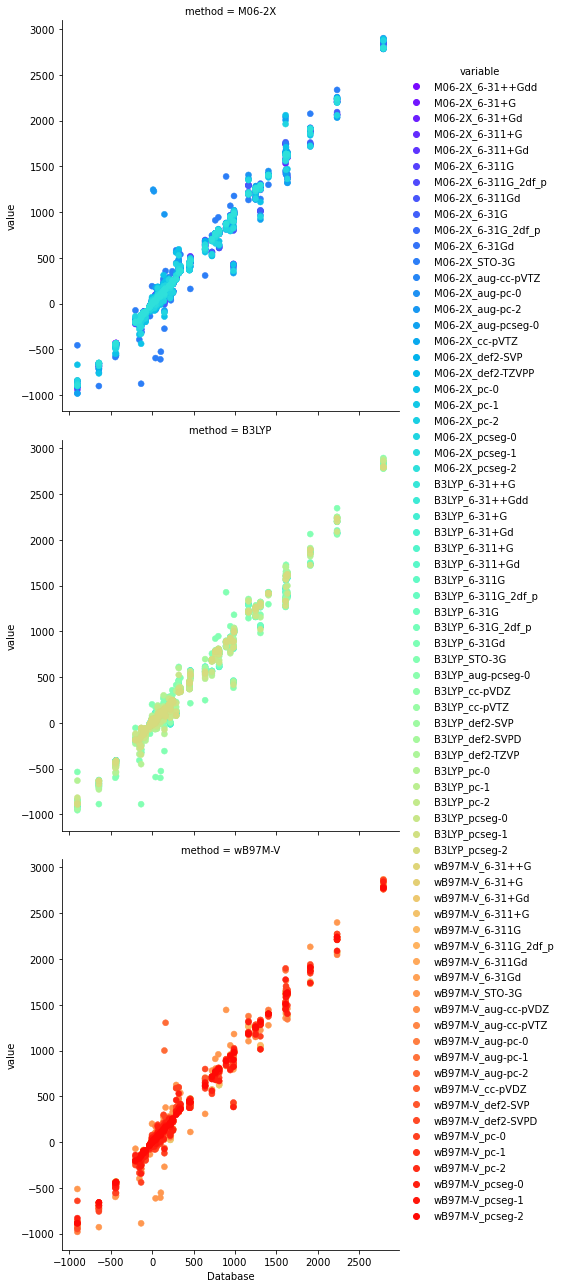

In [57]:
sns.relplot(x = "Database", y = "value", data=new_df, hue = 'variable',  row = 'method',  height = 6 , edgecolor=None, palette = 'rainbow')
#plt.xlim(-20,20)
#plt.ylim(-20,20)
plt.show()
#This is more painful to read due to the method determining the colour as well as the relplot (so M06-2X is always blue)
#want the values close to (0,0)?

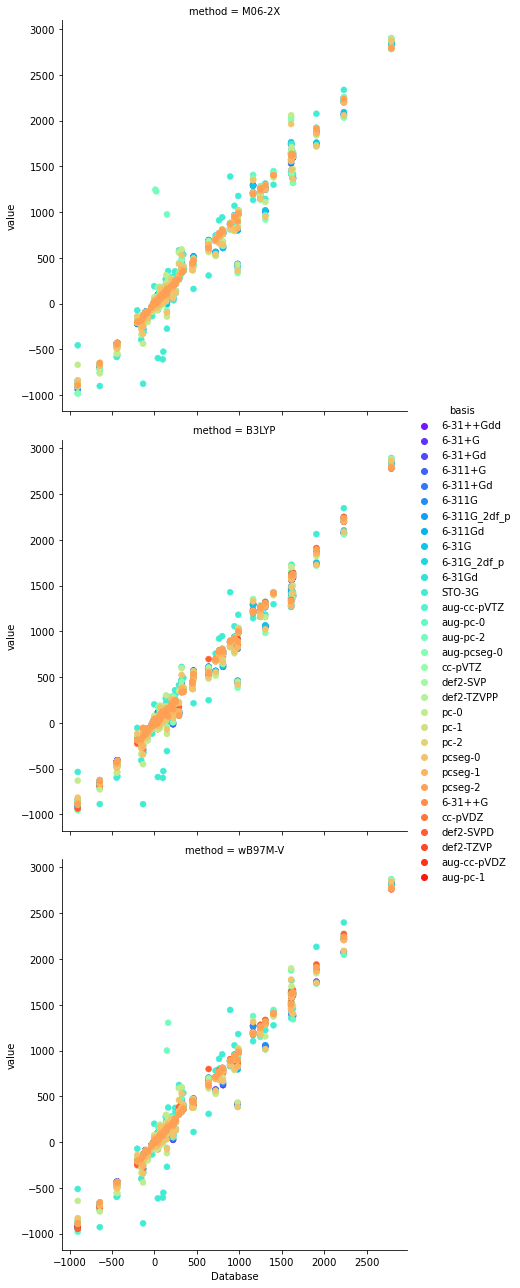

In [58]:
sns.relplot(x = "Database", y = "value", data=new_df, hue = 'basis', row = 'method',  height = 6 , edgecolor=None, palette = 'rainbow', alpha = 1)
#plt.xlim(120,140)
#plt.ylim(-500,500)

plt.show()

## Plot analysis

- These graphs are quite difficult to understand quickly.
- This is due to lots of data covering other bits of data - cant see aug-pcseg-1 at all 
- Zooming in could make it easier to read the data 
- Different basis sets are better with different methods
    - E.g. aug-pcseg-1 and aug-pc-1 perform best with wB97M-V  while pcseg-2 performs better with M06-2X (though pcseg-2 seems pretty goopd either way).
    - Could be interesting doing these graphs with varying methods and basis set being the constant?

# Summary Plots

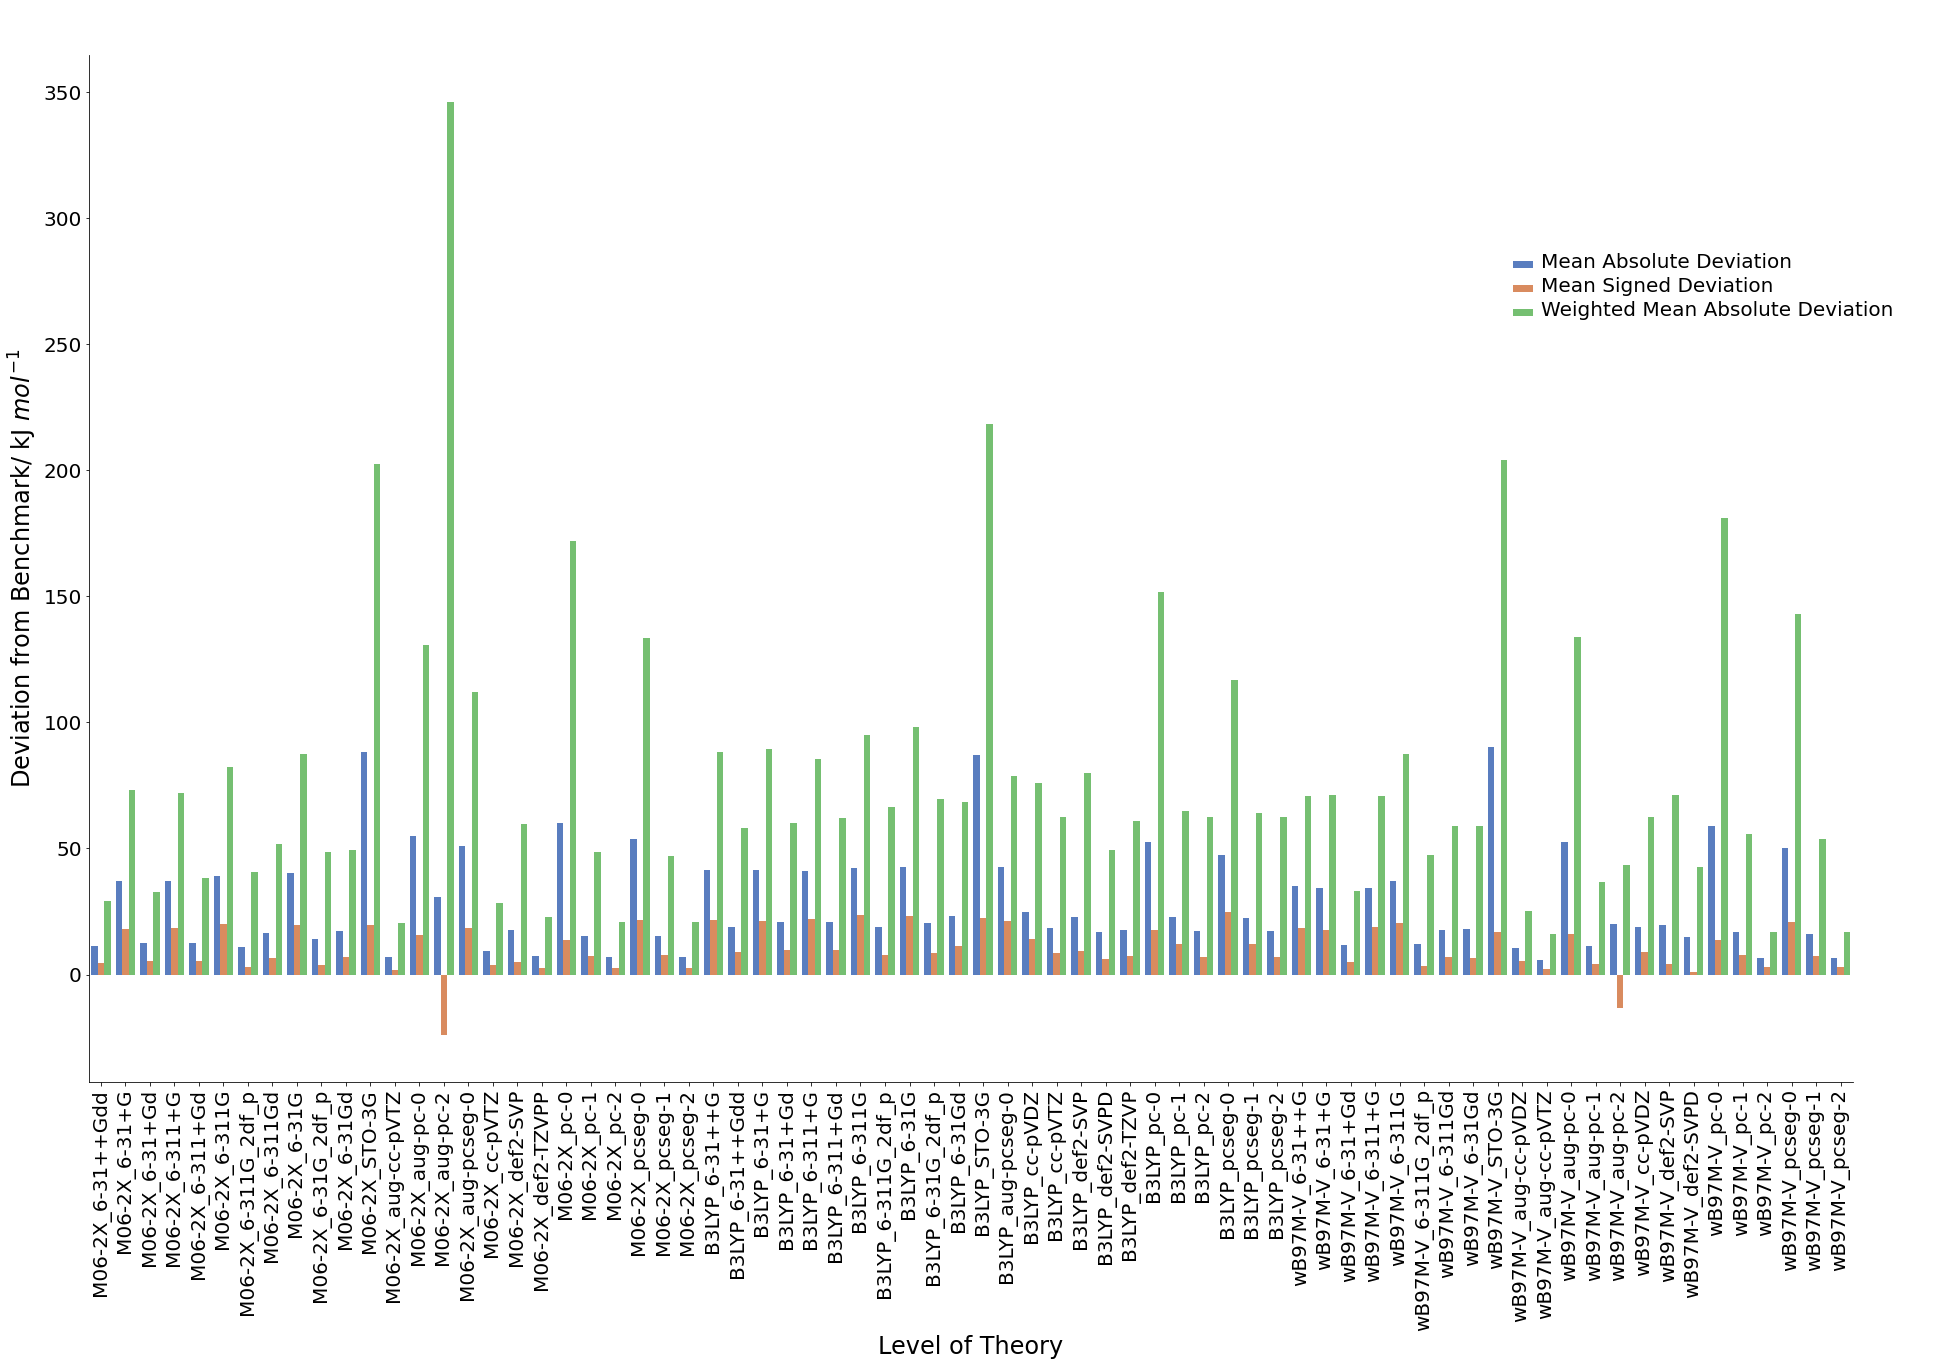

In [59]:
g = sns.catplot(x='name', y='value', hue = 'variable', data=new_means, kind='bar', height=15, palette="muted" ,aspect = 1.7)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)

plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1, 1])
new_labels = ["Mean Absolute Deviation", "Mean Signed Deviation", "Weighted Mean Absolute Deviation"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

Really painful to read, though actually has some good information

    - MSD is negative for aug-pc-2? 
    
    - STO-3G is pretty bad as expected (same as other SZ basis sets)
    
        - This doesnt depend on the method, the basis is bad
        
    - Quite difficult to find the 'good' basis sets from this graph
    
    - Havent found a good way to change the x tick length to make easier to read (so i changed the aspect and height)

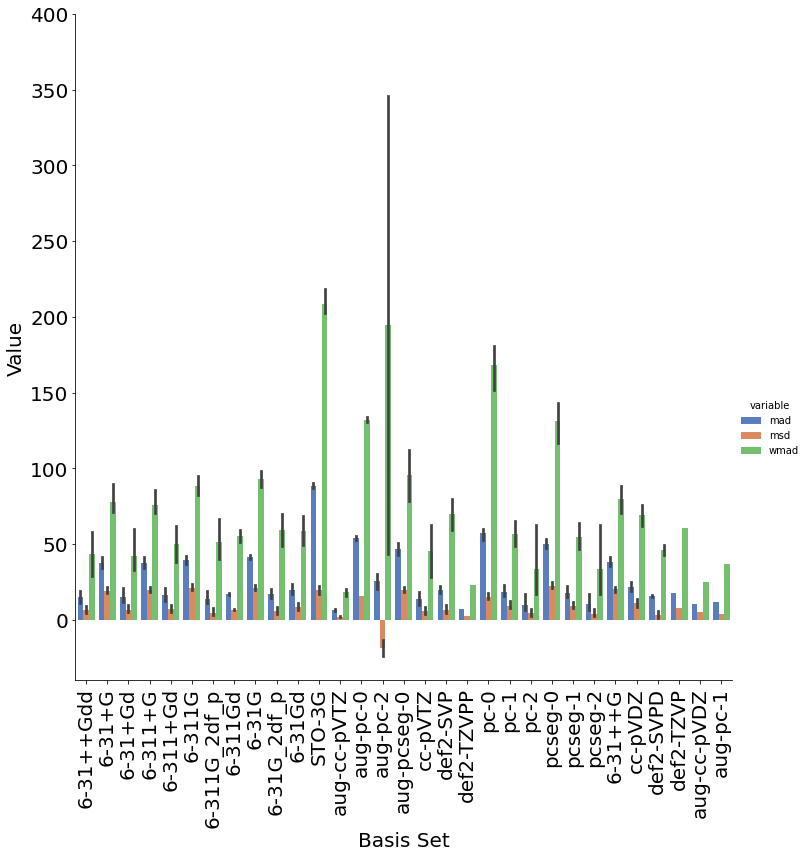

In [60]:
g=sns.catplot(x='basis', y='value', hue = 'variable', data=new_means, kind='bar', height=10, palette="muted")
g.set_xticklabels(rotation=90)
plt.ylim(-40,400)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=20)
plt.ylabel('Value', fontsize=20)
#plt.ylim(-20,30)
plt.show()

- This plot is great at showing which is a good basis set and which isnt
    - SZ are clearly bad
    - Better than the previous at getting the point across about method vs basis set for these calculations
- Some of these are missing error bars? 
    - Not really sure why...

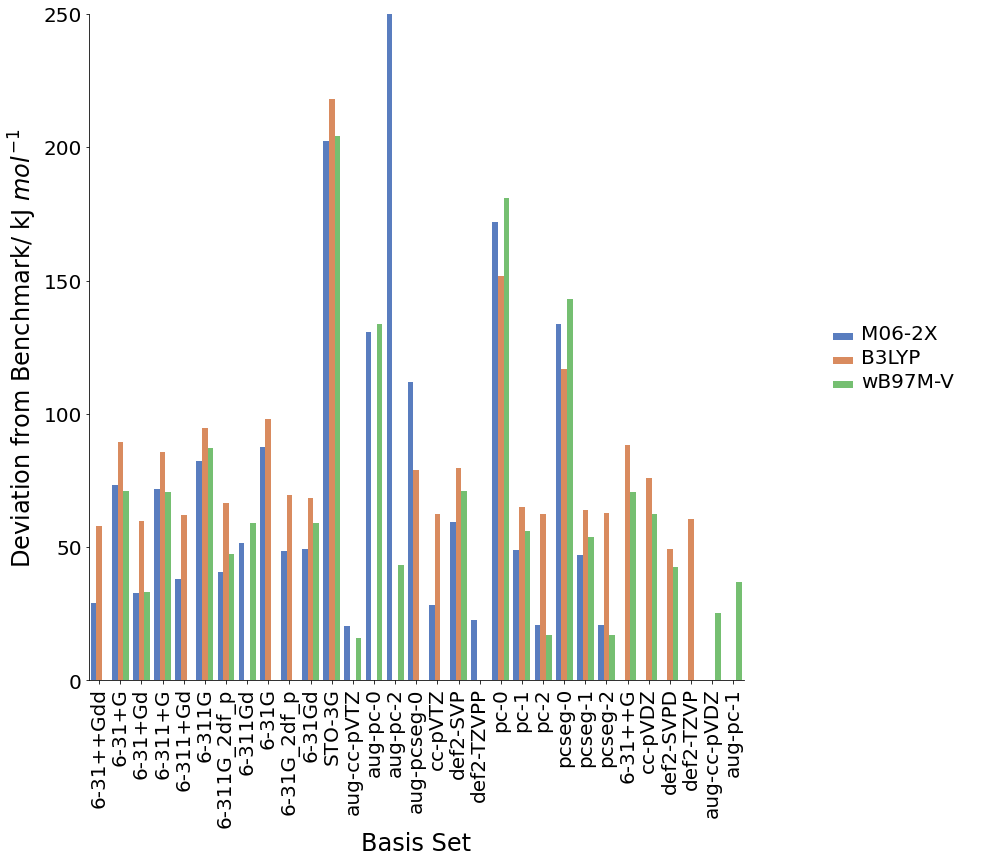

In [61]:
plt.show()

g = sns.catplot(x='basis', y='value', hue = 'method', data=wmadonly, kind='bar', height=10, palette="muted")

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)
plt.ylim(0, 250)


#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

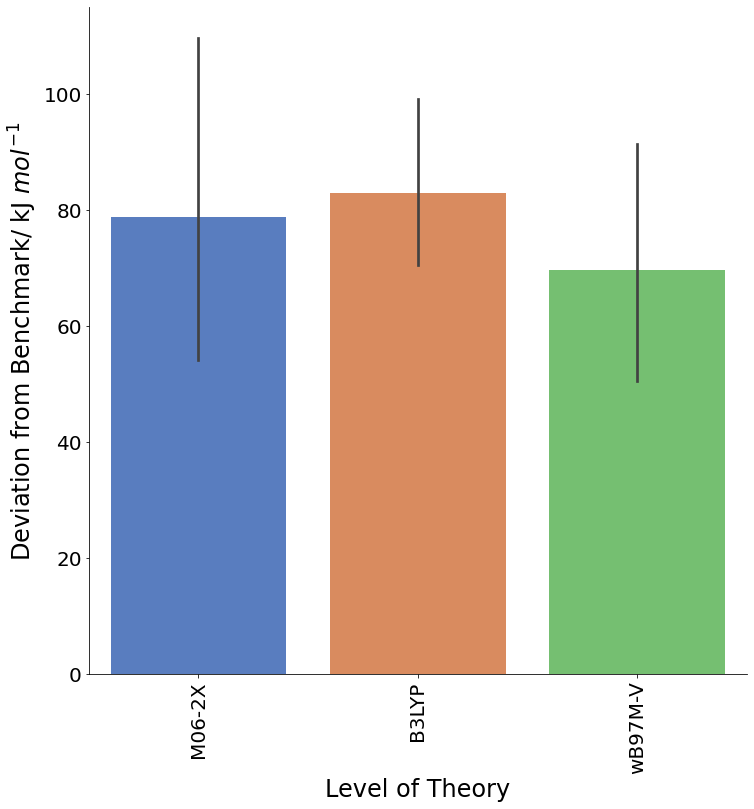

In [62]:


g=sns.catplot(x='method', y='value', data=wmadonly, kind='bar', height=10, palette="muted")

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

M06-2X being so close wB97M-V is concerning? Im not sure if thats an indication of a problem or not

Clearly shows that wB97M-V is a better method than B3LYP (and that we really shouldnt use B3LYP)

In [63]:
TESTINGSIZEXXX = pd.read_csv(f'29Sept/Results/Benchmark_M06-2X.aug-pc-2.csv', sep=',')

In [64]:
TESTINGSIZEXXX = TESTINGSIZEXXX.dropna(axis=1, how='all')
TESTINGSIZEXXX = TESTINGSIZEXXX.dropna(axis=0, how='all')
TESTINGSIZEXXX

,Reaction id,Database,Calc
0,ACONF_1,0.000953,nan
1,ACONF_2,0.000978,nan
2,ACONF_3,0.001531,nan
3,ACONF_4,0.004483,nan
4,ACONF_5,0.000948,nan
...,...,...,...
1494,YBDE18_14,0.121703,nan
1495,YBDE18_15,0.071393,nan
1496,YBDE18_16,0.095791,237.83687110988768
1497,YBDE18_17,0.106118,nan


In [65]:
TESTINGSIZEXXX.iloc[0]

Reaction id     ACONF_1
Database       0.000953
Calc               nan 
Name: 0, dtype: object